In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_con = pd.read_csv("./2023빅콘_데이터전처리.csv")

df_con

,Unnamed: 0,tran_date,tran_time,play_date,play_st_time,seat,price,ticket_cancel,performance_code,genre,running_time,intermission,member_yn,year
0,0,2022-01-14,1512,2022-02-04,2000,3180010,10000,2,302,1.0,120,15,1,2022
1,4,2022-02-06,1615,2022-03-02,1930,1021207,180000,0,897,4.0,90,0,1,2022
2,5,2018-11-24,1145,2019-03-23,2000,1010201,144000,2,528,1.0,100,15,1,2019
3,6,2019-10-20,1459,2019-11-09,1700,3050408,0,0,44,1.0,100,15,0,2019
4,7,2019-06-13,954,2019-07-23,2000,2040804,0,0,827,1.0,120,20,0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096963,1920853,2021-06-18,1509,2021-07-04,1500,1010202,90000,2,887,1.0,110,20,1,2021
1096964,1920855,2023-05-22,1729,2023-06-13,1700,3010604,10000,0,2825,1.0,120,15,1,2023
1096965,1920856,2020-10-09,1652,2020-10-20,1930,1041612,0,0,77,2.0,120,15,0,2020
1096966,1920858,2020-07-26,1655,2020-08-18,1930,1042008,0,0,850,3.0,110,15,0,2020


In [24]:

df_con.drop(['Unnamed: 0'], axis=1, inplace=True)
df_con

,tran_date,tran_time,play_date,play_st_time,seat,price,ticket_cancel,performance_code,genre,running_time,intermission,member_yn,year
0,2022-01-14,1512,2022-02-04,2000,3180010,10000,2,302,1.0,120,15,1,2022
1,2022-02-06,1615,2022-03-02,1930,1021207,180000,0,897,4.0,90,0,1,2022
2,2018-11-24,1145,2019-03-23,2000,1010201,144000,2,528,1.0,100,15,1,2019
3,2019-10-20,1459,2019-11-09,1700,3050408,0,0,44,1.0,100,15,0,2019
4,2019-06-13,954,2019-07-23,2000,2040804,0,0,827,1.0,120,20,0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096963,2021-06-18,1509,2021-07-04,1500,1010202,90000,2,887,1.0,110,20,1,2021
1096964,2023-05-22,1729,2023-06-13,1700,3010604,10000,0,2825,1.0,120,15,1,2023
1096965,2020-10-09,1652,2020-10-20,1930,1041612,0,0,77,2.0,120,15,0,2020
1096966,2020-07-26,1655,2020-08-18,1930,1042008,0,0,850,3.0,110,15,0,2020


In [19]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers

# 특성과 목표 변수 분리
X = df_con[["tran_time","play_st_time",
            "performance_code","ticket_cancel", "year", "seat", "genre","running_time",
           "intermission","member_yn"]]
y = df_con["price"]

# 데이터 분할 (훈련 세트와 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 데이터 정규화 (0과 1 사이의 값으로 스케일링)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 딥러닝 모델 정의
model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),  # 드롭아웃 레이어 추가
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),  # 드롭아웃 레이어 추가
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 훈련
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1)

# 모델 평가
loss = model.evaluate(X_test_scaled, y_test)
print(f"테스트 세트에서의 손실: {loss:.4f}")

# 예측
predictions = model.predict(X_test_scaled)

Epoch 1/100
23997/23997 [==============================] - 67s 3ms/step - loss: 1447651200.0000
Epoch 2/100
23997/23997 [==============================] - 65s 3ms/step - loss: 1039209472.0000
Epoch 3/100
23997/23997 [==============================] - 64s 3ms/step - loss: 800193408.0000
Epoch 4/100
23997/23997 [==============================] - 65s 3ms/step - loss: 670872192.0000
Epoch 5/100
23997/23997 [==============================] - 64s 3ms/step - loss: 584261760.0000
Epoch 6/100
23997/23997 [==============================] - 65s 3ms/step - loss: 538723968.0000
Epoch 7/100
23997/23997 [==============================] - 64s 3ms/step - loss: 513020288.0000
Epoch 8/100
23997/23997 [==============================] - 65s 3ms/step - loss: 488715328.0000
Epoch 9/100
23997/23997 [==============================] - 65s 3ms/step - loss: 467948128.0000
Epoch 10/100
23997/23997 [==============================] - 65s 3ms/step - loss: 446780544.0000
Epoch 11/100
23997/23997 [=====================

23997/23997 [==============================] - 65s 3ms/step - loss: 275614880.0000
Epoch 87/100
23997/23997 [==============================] - 65s 3ms/step - loss: 274464128.0000
Epoch 88/100
23997/23997 [==============================] - 64s 3ms/step - loss: 274203968.0000
Epoch 89/100
23997/23997 [==============================] - 64s 3ms/step - loss: 273447680.0000
Epoch 90/100
23997/23997 [==============================] - 64s 3ms/step - loss: 273973952.0000
Epoch 91/100
23997/23997 [==============================] - 64s 3ms/step - loss: 273942272.0000
Epoch 92/100
23997/23997 [==============================] - 64s 3ms/step - loss: 272668832.0000
Epoch 93/100
23997/23997 [==============================] - 64s 3ms/step - loss: 271438496.0000
Epoch 94/100
23997/23997 [==============================] - 64s 3ms/step - loss: 272201856.0000
Epoch 95/100
23997/23997 [==============================] - 64s 3ms/step - loss: 271136000.0000
Epoch 96/100
23997/23997 [===========================

In [25]:
print("실제 가격\t 예측가격")
for i in range(len(y_test)):
    print(f"{y_test.values[i]:.2f}\t{predictions[i][0]:.2f}")

실제 가격	 예측가격
0.00	2177.59
84000.00	64976.27
42000.00	47881.92
0.00	829.78
47000.00	45325.48
35000.00	22632.67
0.00	-258.77
0.00	655.99
57000.00	86760.82
40000.00	35110.79
290000.00	264454.31
99000.00	83937.05
64000.00	49776.20
0.00	491.89
6000.00	12228.32
0.00	732.32
93000.00	78793.32
0.00	538.00
0.00	480.95
0.00	1170.76
0.00	659.83
0.00	1860.90
100000.00	76797.12
16000.00	14371.17
40000.00	33256.64
0.00	1483.58
47000.00	38086.30
0.00	280.24
15000.00	13450.80
20000.00	11262.21
0.00	982.88
0.00	833.80
0.00	580.31
0.00	25163.98
9000.00	8568.56
7000.00	13505.50
0.00	559.88
0.00	438.42
60000.00	110120.16
10000.00	22678.52
108000.00	83885.37
95000.00	74727.67
90000.00	69094.71
24000.00	15154.65
0.00	2718.28
120000.00	94359.43
80000.00	68538.94
18000.00	13651.65
0.00	7553.39
76000.00	64057.66
0.00	1803.68
36000.00	40941.29
0.00	3490.64
0.00	13654.13
42000.00	47975.01
0.00	244.37
0.00	623.71
8000.00	9861.88
0.00	950.51
130000.00	93953.84
0.00	444.20
0.00	14657.41
0.00	3741.25
0.00	592.47
76000

123000.00	72895.16
171000.00	172513.70
0.00	219.84
59000.00	73462.06
0.00	659.30
15000.00	14027.33
90000.00	79118.53
90000.00	66336.99
114000.00	39670.92
0.00	265.34
0.00	669.28
0.00	909.52
0.00	2428.76
24000.00	24319.87
0.00	639.52
0.00	237.73
0.00	940.33
49000.00	41645.46
27000.00	18227.35
0.00	856.79
0.00	2384.72
10000.00	11407.63
0.00	760.08
0.00	950.01
30000.00	31353.72
36000.00	28251.62
0.00	1734.87
0.00	3152.98
10000.00	49189.61
0.00	790.21
0.00	-76.00
75000.00	63448.03
0.00	452.39
85000.00	82771.08
0.00	529.72
0.00	652.36
0.00	1433.08
0.00	579.52
0.00	730.48
25000.00	24678.44
100000.00	59475.29
171000.00	109659.20
0.00	778.34
85000.00	49392.79
0.00	500.02
0.00	602.29
0.00	827.87
0.00	665.22
0.00	1430.17
0.00	586.96
0.00	424.30
15000.00	13843.89
20000.00	13751.13
0.00	617.01
50000.00	50865.13
32000.00	15836.53
0.00	715.90
130000.00	75693.15
10000.00	31425.94
0.00	6776.07
100000.00	4000.37
0.00	611.14
121000.00	91482.74
28000.00	32994.88
45000.00	57624.95
10000.00	18064.70
0.00	6

0.00	525.89
0.00	429.22
49000.00	44287.11
0.00	669.76
123000.00	80524.73
0.00	1560.55
10000.00	18011.03
0.00	723.19
133000.00	96275.88
0.00	487.36
60000.00	55573.77
0.00	675.58
0.00	-241.16
100000.00	1063.40
0.00	842.06
234000.00	231633.14
297000.00	238094.72
0.00	4979.97
108000.00	67155.76
96000.00	89328.48
140000.00	120963.66
50000.00	42370.38
0.00	3349.34
85000.00	61767.36
110000.00	84431.94
0.00	681.25
80000.00	53928.01
0.00	807.52
0.00	440.02
153000.00	132302.02
66000.00	57416.40
150000.00	211745.91
30000.00	16966.46
100000.00	66838.13
45000.00	56296.39
42000.00	25175.24
27000.00	32140.06
24000.00	22334.97
0.00	1279.99
123000.00	97446.10
0.00	455.01
0.00	810.34
0.00	401.86
0.00	613.63
0.00	180.78
0.00	529.68
0.00	479.82
66000.00	67569.65
14000.00	23447.33
80000.00	60951.82
0.00	473.15
0.00	619.13
0.00	913.59
130000.00	130508.77
30000.00	36356.33
0.00	481.55
0.00	716.89
0.00	2606.46
0.00	2482.96
0.00	16025.57
80000.00	52433.81
171000.00	176144.45
80000.00	54735.46
0.00	6138.44
9500

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 실제 가격과 예측 가격 데이터
actual_prices = y_test.values
predicted_prices = [prediction[0] for prediction in predictions]

# MSE 계산
mse = mean_squared_error(actual_prices, predicted_prices)

# MAE 계산
mae = mean_absolute_error(actual_prices, predicted_prices)

# R 제곱 계산
r2 = r2_score(actual_prices, predicted_prices)

print(f"평균 제곱 오차 (MSE): {mse:.2f}")
print(f"평균 절대 오차 (MAE): {mae:.2f}")
print(f"R 제곱 (R-squared): {r2:.2f}")

평균 제곱 오차 (MSE): 330435388.66
평균 절대 오차 (MAE): 8575.01
R 제곱 (R-squared): 0.88


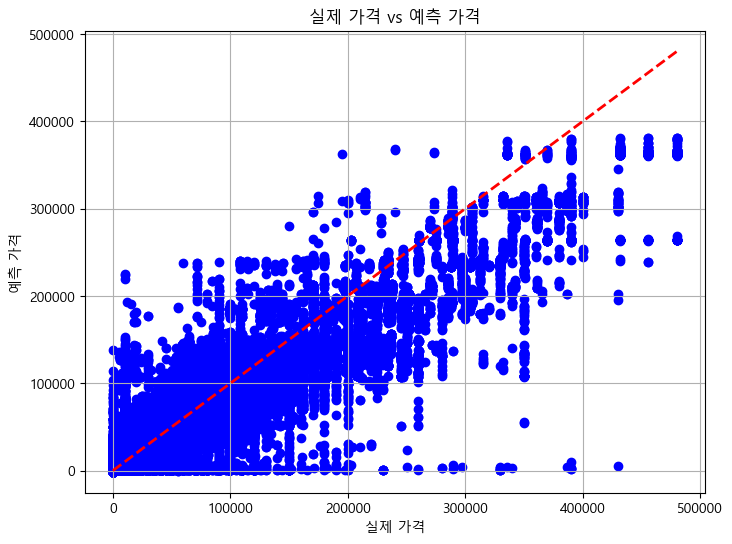

In [22]:
# 산점도 그리기
plt.rc('font', family='Malgun Gothic')

plt.figure(figsize=(8,6))
plt.scatter(actual_prices, predicted_prices, color='b')
plt.title('실제 가격 vs 예측 가격')
plt.xlabel('실제 가격')
plt.ylabel('예측 가격')
plt.grid(True)

# 대각선 선 그리기 (길제 가격과 예측 가격이 같은 경우)
plt.plot([min(actual_prices), max(actual_prices)],
        [min(actual_prices), max(actual_prices)], linestyle = '--', color = 'r', linewidth=2)

# 그래프 그리기
plt.show()